In [2]:
# Import packages
import random
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Set itterations (10000 should remove all meaningful variance)
itterations = 10000

# Create empty dataframe
df = pd.DataFrame()

#create a tuple of numbers we would like to roll to before quiting our turn, testing each one individually
numbers_until_quit = tuple(range(1, 71))

# I ran by 5's to get a glance
#numbers_until_quit =(5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95)

# Honed into effective range
#numbers_until_quit = tuple(range(10,30))

# Itterate for each number we want to reach before we quit our turn
for f in (numbers_until_quit):

    # Reset average turns before testing a new number
    average_turns=0
    
    # Each itterations is equal to 1 game
    for i in range (itterations):
        
        # Reset turns and total points before starting new game
        turns=0
        point_total=0
        
        # While loop keeps the game going until we reach the winning score, 100
        while point_total <100:
        
            # Add a turn and reset the point total for each turn before starting a new turn
            turns+=1
            point_total_turn=0
            
            # While loop keeps us rolling until we reach the point total we want to stop at or until we roll a pig
            while point_total_turn < f:
                roll=random.randint(1,6)
                if roll != 1:
                    point_total_turn +=roll
                else:
                    point_total_turn=0
                    break
                    
            # If we do not roll a pig and we reach our point total threshold then we add those points to our total game points        
            if point_total_turn > 0:
                point_total+=point_total_turn
            else:
                point_total + 0
        
        # Not actually the average turns but the total turns for each number tested
        # Must be divided by total itterations to get average turns
        average_turns += turns
    			
    # Put our point threshold next to the average turns in a dataframe
    df = pd.concat([df, pd.DataFrame({'Points Until End of Turn': [f], 'Average Turns': [average_turns/itterations]})], ignore_index=True)


In [17]:
# Print dataframe
print(df[25:40])

    Points Until End of Turn  Average Turns
25                        26        13.9099
26                        27        14.6067
27                        28        15.3027
28                        29        15.9471
29                        30        16.5743
30                        31        16.1891
31                        32        15.0014
32                        33        14.3583
33                        34        15.1092
34                        35        15.6457
35                        36        16.4007
36                        37        17.2952
37                        38        17.9817
38                        39        18.7251
39                        40        19.7085


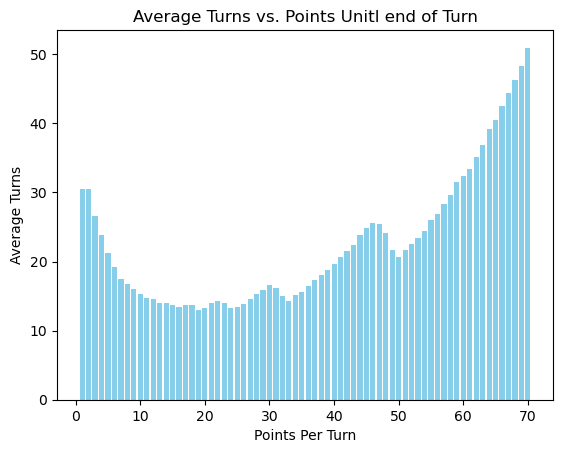

In [7]:
# Graph dataframe
plt.bar(df['Points Until End of Turn'], df['Average Turns'], color='skyblue')
plt.xlabel('Points Per Turn')
plt.ylabel('Average Turns')
plt.title('Average Turns vs. Points Unitl end of Turn')
plt.show()